In [1]:
from fastai import *
from fastai.vision import *

In [3]:
from google.colab import files
files.upload()

Saving train_v2.csv to train_v2.csv


{'train_v2.csv': b'image_name,tags\ntrain_0,haze primary\ntrain_1,agriculture clear primary water\ntrain_2,clear primary\ntrain_3,clear primary\ntrain_4,agriculture clear habitation primary road\ntrain_5,haze primary water\ntrain_6,agriculture clear cultivation primary water\ntrain_7,haze primary\ntrain_8,agriculture clear cultivation primary\ntrain_9,agriculture clear cultivation primary road\ntrain_10,agriculture clear primary slash_burn water\ntrain_11,clear primary water\ntrain_12,cloudy\ntrain_13,clear primary\ntrain_14,cloudy\ntrain_15,clear primary\ntrain_16,clear primary\ntrain_17,partly_cloudy primary\ntrain_18,clear primary\ntrain_19,agriculture clear primary road\ntrain_20,agriculture clear primary water\ntrain_21,clear primary road water\ntrain_22,partly_cloudy primary\ntrain_23,agriculture clear primary road\ntrain_24,conventional_mine partly_cloudy primary\ntrain_25,clear primary\ntrain_26,cloudy\ntrain_27,agriculture partly_cloudy primary water\ntrain_28,clear primary\nt

Multi Classification

In [ ]:
path = Config.data_path()/'planet'
path.mkdir(parents=True, exist_ok=True)
path

PosixPath('/root/.fastai/data/planet')

In [4]:
np.random.seed(42)

In [5]:
planet=untar_data(URLs.PLANET_TINY) 
 
tfms = get_transforms(flip_vert=True,max_lighting=0.1,max_zoom=1.05,max_warp=0.) #data transformations

src = (ImageList.from_csv(planet,"labels.csv",folder="train",suffix=".jpg") #where to find the data 
.random_split_by_pct(0.2) #how to split in train and validation
.label_from_df(label_delim=' ')) #how to label the images

/usr/local/lib/python3.6/dist-packages/fastai/data_block.py:217: UserWarning: `random_split_by_pct` is deprecated, please use `split_by_rand_pct`.
  warn("`random_split_by_pct` is deprecated, please use `split_by_rand_pct`.")


In [ ]:
data = (src.transform(tfms, size=128) #what data augmentations to use on data
        .databunch(num_workers=0).normalize(imagenet_stats)) #finally passing to Databunch

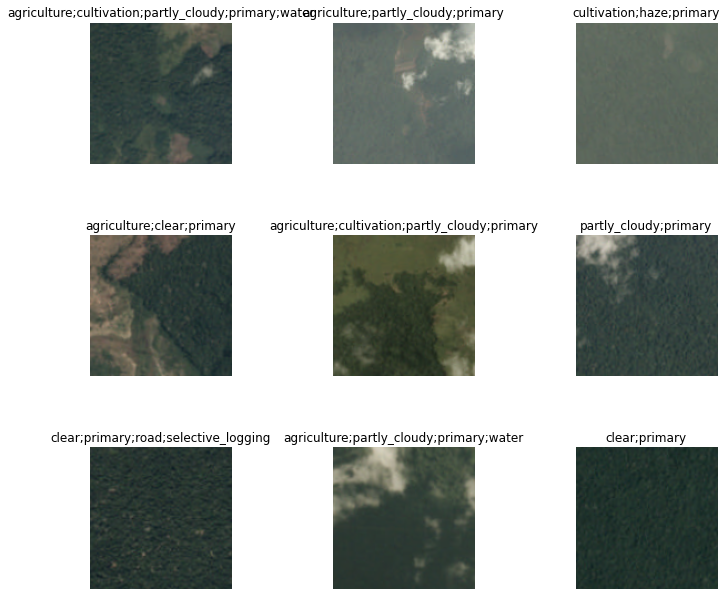

In [ ]:
data.show_batch(rows =3 ,figsize=(10,9))

In [ ]:
df = pd.read_csv("train_v2.csv")

In [ ]:
df.head()

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


In [ ]:
df.shape

(40479, 2)

Modelling 

In [ ]:
arch = models.resnet34

In [ ]:
acc = partial(accuracy_thresh,thresh = 0.2)
f_score = partial(fbeta,thresh = 0.2)
model = create_cnn(data,arch,metrics = [acc, f_score])

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


Using LR to find a goodpick for learning rate

In [ ]:
model.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


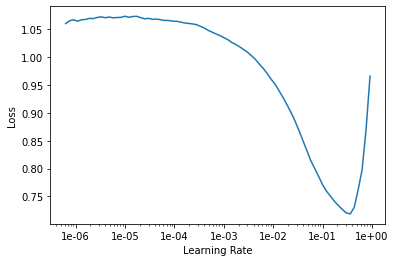

In [ ]:
model.recorder.plot()

In [ ]:
lr = 0.01

In [ ]:
model.fit_one_cycle(3,slice(lr))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.626363,0.702861,0.417857,0.567357,00:16
1,0.598266,0.701616,0.521429,0.601300,00:16
2,0.552345,0.656155,0.525000,0.597385,00:15
